In [22]:
from imageai.Prediction import ImagePrediction
import os
import pandas as pd
import numpy as np
from PIL import Image

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
%matplotlib inline 

In [23]:
execution_path = os.getcwd()

prediction = ImagePrediction()
prediction.setModelTypeAsDenseNet()
prediction.setModelPath(os.path.join(execution_path, "/home/guest/Documents/Test1/ImageAI-master/imageai/Prediction/Weights/DenseNet.h5"))
prediction.loadModel()
TEST_PATH = '/home/guest/Documents/Aikomi'
pred_array = np.empty((0,6),dtype=object)
for img in os.listdir(TEST_PATH):
    if img.endswith('.jpg'):
        image = Image.open(os.path.join(TEST_PATH, img))
        image = image.convert("RGB")
        image = np.array(image, dtype=np.uint8)
        predictions, probabilities = prediction.predictImage(os.path.join(TEST_PATH, img), result_count=5)
        temprow = np.zeros((1,pred_array.shape[1]),dtype=object)
        temprow[0,0] = img
        for i in range(len(predictions)):
            temprow[0,i+1] = predictions[i]
        pred_array = np.append(pred_array,temprow,axis=0)

In [3]:
all_tags = pred_array[:,1:6].reshape(1,-1).tolist()
_in_sent = ' '.join(list(map(str,all_tags)))
mappings = []
for i in pred_array:
    for j in range(1):
        mappings.append([i[0],i[j+1]])

In [4]:
all_tags = pred_array[:,1:2].reshape(1,-1).tolist()
_in_sent = ' '.join(list(map(str,all_tags)))

#Storing image_name along with labels
mappings = []
for i in pred_array:
    for j in range(1):
        mappings.append([i[0],i[j+1]])

In [5]:
model = Word2Vec(all_tags, min_count=1, size=2, alpha=0.025)
words = list(model.wv.vocab)
vector = list()
for word in words:
    vector.append(model[word])
X = model[model.wv.vocab]
model = Word2Vec(all_tags, min_count=1, size=2, alpha=0.025)
words = list(model.wv.vocab)
vector = list()
for word in words:
    vector.append(model[word])

/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [6]:
image_name = []
for i in range(len(all_tags[0])):
    image_name.append(mappings[i][0])

In [7]:
print(np.shape(image_name))

(354,)


In [8]:
Xaxis = list()
yaxis = list()
myarray = np.reshape(vector[:(np.shape(vector)[0])], 2*(np.shape(vector)[0]))
for loop1 in range(2*(np.shape(vector)[0])):
    if(loop1%2 ==0):
        Xaxis.append(myarray[loop1])
    else:
        yaxis.append(myarray[loop1])
X = np.vstack((Xaxis, yaxis)).T

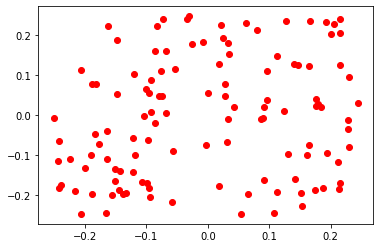

In [18]:
plt.plot(Xaxis,yaxis, 'ro')

<function matplotlib.pyplot.show(*args, **kw)>

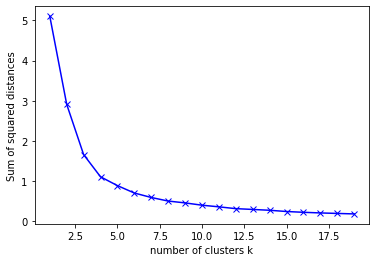

In [21]:
sum_squared_dist = []
K = range(1,20)
for k in K:
    km_bow = KMeans(n_clusters=k, random_state=0)
    km_bow = km_bow.fit(X)
    sum_squared_dist.append(km_bow.inertia_)
plt.plot(K, sum_squared_dist, 'bx-')
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.show

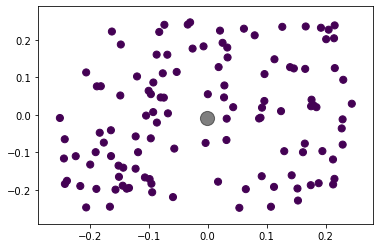

In [11]:
int(round(np.mean(sum_squared_dist)))
kmeans = KMeans(n_clusters= int(round(np.mean(sum_squared_dist))))
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [17]:
#Clustered table formation
cluster_center = list()
for center in range(len(X)):
    cluster_center.append(y_kmeans[center])
mappings = {k:v for k,v in zip(words, image_name)}
tag_cluster = pd.DataFrame({'cluster_center': cluster_center,'image_tags': words })
tag_cluster['image_name'] = pd.Series([mappings[i] for i in tag_cluster.image_tags])
#df_cluster1 = tag_cluster[tag_cluster['cluster_center']==0]
#df_cluster2 = tag_cluster[tag_cluster['cluster_center']==1]
#df_cluster3 = tag_cluster[tag_cluster['cluster_center']==2]
#df_cluster4 = tag_cluster[tag_cluster['cluster_center']==3]
tag_cluster

,cluster_center,image_tags,image_name
0,0,Maltese_dog,1541565430897-Dog-maltese1.jpg
1,0,alp,1534154099702-2017-01-06.jpg
2,0,sandbar,1536925205335-0811wallpaper-5_1280.jpg
3,0,cauliflower,1534160719354-0811wallpaper-1_1280.jpg
4,0,fountain,1541071465047-tree-736885__340.jpg
5,0,racket,0811wallpaper-8_1280.jpg
6,0,lorikeet,1541564513943-Bird-parakeet1.jpg
7,0,kite,1541564513810-Bird-finch1.jpg
8,0,stone_wall,1541076156450-0818wallpaper-10_1280.jpg
9,0,basketball,1541075914699-0811wallpaper-8_1280.jpg
